In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of entries to simulate
num_entries = 100

# Generate random dates within a range for the survey
start_date = datetime.strptime('1/1/2018', '%m/%d/%Y')
end_date = datetime.strptime('8/1/2024', '%m/%d/%Y')

# Regions for simulation
regions = ['East Coast', 'West Coast', 'Upper East Coast', 'Upper West Coast']

# Function to generate a random date within a range
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Initialize lists to store data
survey_id = list(range(1, num_entries + 1))
region = np.random.choice(regions, num_entries)
survey_date = [random_date(start_date, end_date).strftime('%m/%d/%Y') for _ in range(num_entries)]
latitude = np.random.uniform(-47.0, -34.0, num_entries)
longitude = np.random.uniform(166.0, 179.0, num_entries)

# Generate rubbish counts based on regions
rubbish_count = []
for r in region:
    if r == 'Upper East Coast':
        rubbish_count.append(np.random.normal(loc=200, scale=20))
    elif r == 'East Coast':
        rubbish_count.append(np.random.normal(loc=125, scale=25))
    elif r == 'Upper West Coast':
        rubbish_count.append(np.random.normal(loc=125, scale=25))
    else:  # West Coast
        rubbish_count.append(np.random.normal(loc=50, scale=10))

# Initialize count_same and date_average
count_same = [112] * num_entries
date_average = np.random.uniform(0, 5, num_entries)

# Simulate ocean current data
np.random.seed(42)  # For reproducibility
current_speed = np.random.normal(loc=0.5, scale=0.1, size=num_entries)  # Current speed in m/s
current_direction = np.random.uniform(low=0, high=360, size=num_entries)  # Direction in degrees

# Reduce rubbish count if current direction points away
for i in range(num_entries):
    if 90 < current_direction[i] < 270:  # Assuming away is between East (90) and West (270)
        rubbish_count[i] *= 0.8

# Simulate water temperature (with different means for regions)
temperature = []
for r in region:
    if r == 'Upper East Coast':
        temperature.append(np.random.normal(loc=18, scale=1))
    elif r == 'East Coast':
        temperature.append(np.random.normal(loc=16, scale=1))
    elif r == 'Upper West Coast':
        temperature.append(np.random.normal(loc=17, scale=1))
    else:  # West Coast
        temperature.append(np.random.normal(loc=14, scale=1))

# Create DataFrame
simulated_data = {
    'SurveyId': survey_id,
    'Region': region,
    'SurveyDate': survey_date,
    'SurveyAreaLatitudeStart': latitude,
    'SurveyAreaLongitudeStart': longitude,
    'Rubbish_Count': rubbish_count,
    'count_same': count_same,
    'date average': date_average,
    'Current_Speed': current_speed,
    'Current_Direction': current_direction,
    'Water_Temperature': temperature
}

df_simulated = pd.DataFrame(simulated_data)

# Save to CSV
df_simulated.to_csv('simulated_nz_ocean_current_with_regions.csv', index=False)
(df_simulated)


,SurveyId,Region,SurveyDate,SurveyAreaLatitudeStart,SurveyAreaLongitudeStart,Rubbish_Count,count_same,date average,Current_Speed,Current_Direction,Water_Temperature
0,1,Upper West Coast,06/23/2020,-42.839355,174.901505,97.859393,112,1.008137,0.549671,150.267961,17.013002
1,2,Upper West Coast,02/11/2019,-35.358198,168.114020,99.118942,112,0.818280,0.486174,79.958812,18.453534
2,3,Upper East Coast,04/13/2019,-41.940378,177.842053,188.927014,112,0.821329,0.564769,43.151532,17.735343
3,4,West Coast,06/17/2018,-46.859111,176.692984,30.416977,112,4.072874,0.652303,121.541462,16.720169
4,5,East Coast,06/03/2020,-35.230034,178.347399,174.118128,112,3.325986,0.476585,339.447493,16.625667
...,...,...,...,...,...,...,...,...,...,...,...
95,96,East Coast,02/15/2022,-34.179260,166.531292,121.108069,112,1.990843,0.353649,87.836272,14.564138
96,97,West Coast,05/04/2022,-37.923898,168.196156,61.677821,112,2.686978,0.529612,350.283800,15.163164
97,98,Upper West Coast,09/30/2023,-40.030747,169.621674,105.088417,112,4.599278,0.526106,141.515181,17.010233
98,99,Upper West Coast,10/03/2021,-42.976141,168.301136,133.440067,112,1.731730,0.500511,321.136760,16.018491


In [8]:
# Convert to DataFrame
df_simulated = pd.DataFrame(simulated_data)

# Encode the 'Region' column
le = LabelEncoder()
df_simulated['Region'] = le.fit_transform(df_simulated['Region'])

# # Split into features and target
# X = df_simulated.drop(columns=['Rubbish_Count','SurveyDate','count_same','date average','SurveyAreaLatitudeStart','SurveyAreaLongitudeStart','SurveyId'])
# y = df_simulated['Rubbish_Count']

# print(X)

# # Split into training and test sets
# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(xtrain)
# X_test_scaled = scaler.transform(xtest)

# # Linear Regression
# linear_model = LinearRegression()
# linear_model.fit(X_train_scaled, ytrain)
# y_pred_linear = linear_model.predict(X_test_scaled)

# # Evaluate Linear Regression
# mse_linear = mean_squared_error(ytest, y_pred_linear)
# r2_linear = r2_score(ytest, y_pred_linear)

# print(f"Linear Regression - Mean Squared Error: {mse_linear:.2f}, R^2 Score: {r2_linear:.2f}")

# # Random Forest Model
# random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
# random_forest_model.fit(X_train_scaled, ytrain)
# y_pred_rf = random_forest_model.predict(X_test_scaled)

# # Evaluate Random Forest
# mse_rf = mean_squared_error(ytest, y_pred_rf)
# r2_rf = r2_score(ytest, y_pred_rf)

# print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}, R^2 Score: {r2_rf:.2f}")


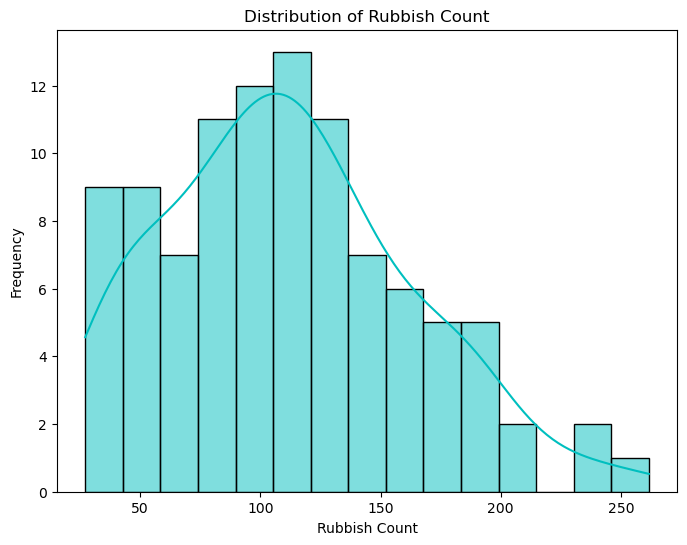

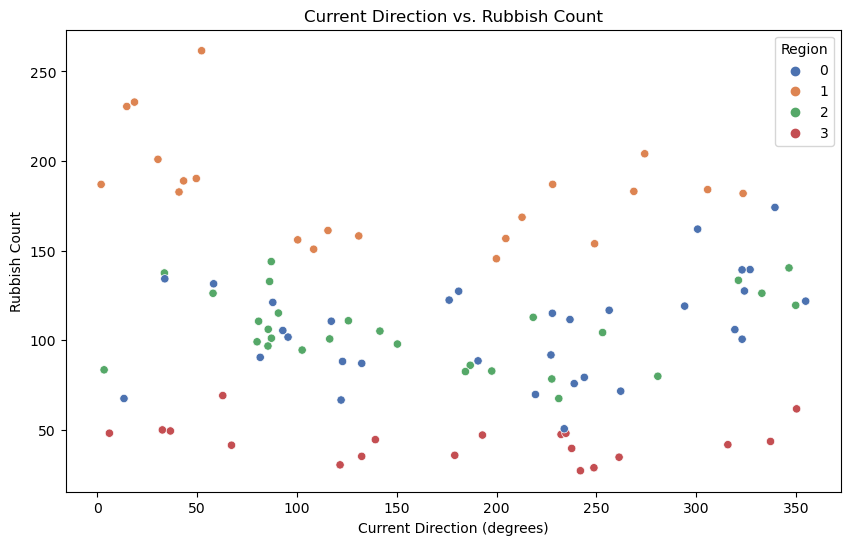

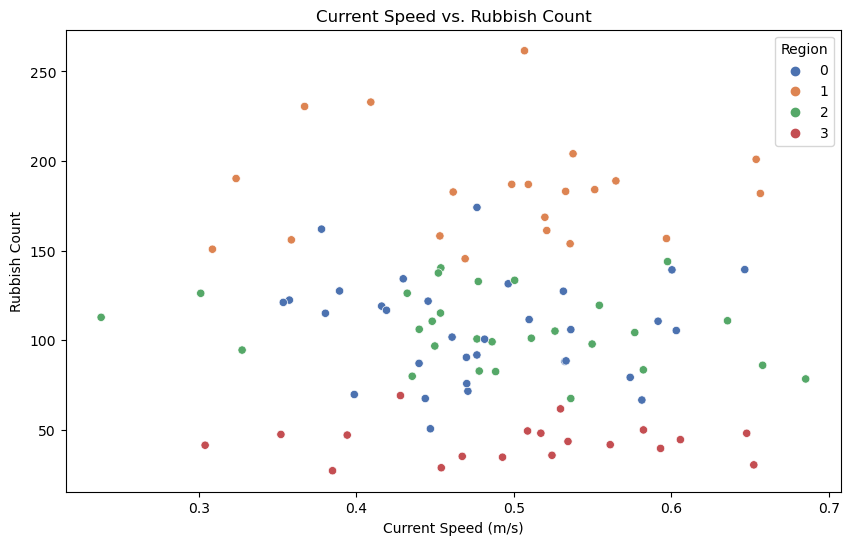

Linear Regression - Mean Squared Error: 2396.40, R^2 Score: 0.40
Random Forest - Mean Squared Error: 894.89, R^2 Score: 0.78


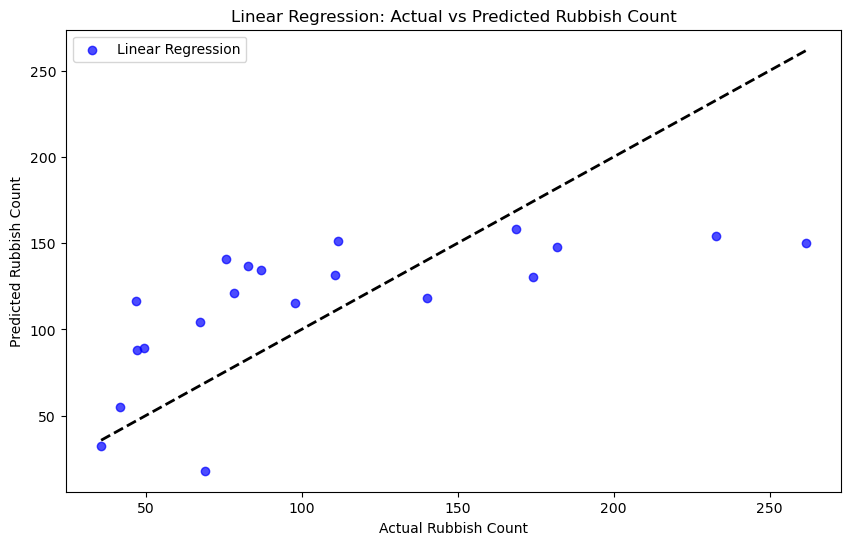

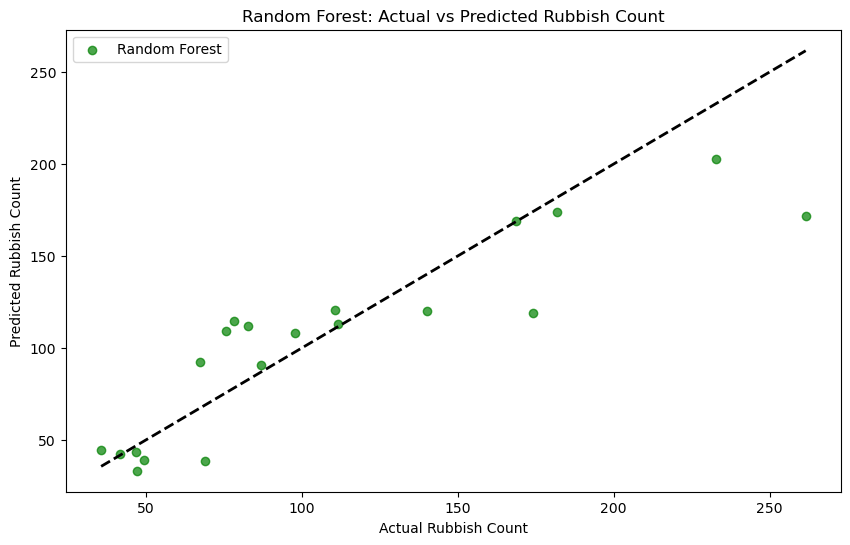

In [9]:

# Visualize distribution of Rubbish Count
plt.figure(figsize=(8, 6))
sns.histplot(df_simulated['Rubbish_Count'], bins=15, kde=True, color='c')
plt.title('Distribution of Rubbish Count')
plt.xlabel('Rubbish Count')
plt.ylabel('Frequency')
plt.show()

# Visualize Current Direction vs. Rubbish Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_simulated, x='Current_Direction', y='Rubbish_Count', hue='Region', palette='deep')
plt.title('Current Direction vs. Rubbish Count')
plt.xlabel('Current Direction (degrees)')
plt.ylabel('Rubbish Count')
plt.legend(title='Region')
plt.show()

# Visualize Current Speed vs. Rubbish Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_simulated, x='Current_Speed', y='Rubbish_Count', hue='Region', palette='deep')
plt.title('Current Speed vs. Rubbish Count')
plt.xlabel('Current Speed (m/s)')
plt.ylabel('Rubbish Count')
plt.legend(title='Region')
plt.show()

# Encode the 'Region' column
le = LabelEncoder()
df_simulated['Region'] = le.fit_transform(df_simulated['Region'])

# Split into features and target
X = df_simulated.drop(columns=['Rubbish_Count','SurveyDate','count_same','date average','SurveyAreaLatitudeStart','SurveyAreaLongitudeStart','SurveyId'])
y = df_simulated['Rubbish_Count']

# Split into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, ytrain)
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression
mse_linear = mean_squared_error(ytest, y_pred_linear)
r2_linear = r2_score(ytest, y_pred_linear)

print(f"Linear Regression - Mean Squared Error: {mse_linear:.2f}, R^2 Score: {r2_linear:.2f}")

# Random Forest Model
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_scaled, ytrain)
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate Random Forest
mse_rf = mean_squared_error(ytest, y_pred_rf)
r2_rf = r2_score(ytest, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}, R^2 Score: {r2_rf:.2f}")

# Plot actual vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred_linear, alpha=0.7, color='b', label='Linear Regression')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel('Actual Rubbish Count')
plt.ylabel('Predicted Rubbish Count')
plt.title('Linear Regression: Actual vs Predicted Rubbish Count')
plt.legend()
plt.show()

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred_rf, alpha=0.7, color='g', label='Random Forest')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel('Actual Rubbish Count')
plt.ylabel('Predicted Rubbish Count')
plt.title('Random Forest: Actual vs Predicted Rubbish Count')
plt.legend()
plt.show()
